In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_csv('final_results_w10.csv')
df.head()

,rank,avg_EventLatency,avg_ProcessingLatency,var_EventLatency,var_ProcessingLatency,TotalMessages,iteration,kafka,spark
0,1,5.729447,2.716137,0.639460,0.781969,5000000,1,1,1
1,2,2.775501,2.237396,0.727766,0.933735,5000000,1,1,1
2,3,2.746134,2.256595,0.687106,0.885862,5000000,1,1,1
3,4,2.752111,2.264715,0.653460,0.902096,5000000,1,1,1
4,5,2.567114,2.219118,0.688600,0.897054,5000000,1,1,1


In [4]:
df.describe()

,rank,avg_EventLatency,avg_ProcessingLatency,var_EventLatency,var_ProcessingLatency,TotalMessages,iteration,kafka,spark
count,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03,2294.000000,2294.00000,2294.000000
mean,33.168701,1.908327,1.292307,0.313095,0.263934,8.246260e+06,0.569747,2.14952,2.203575
std,18.974950,0.655961,0.396819,0.293689,0.263493,3.900300e+06,0.598858,0.76665,0.918372
min,1.000000,0.750058,0.669484,0.013838,0.012850,3.840000e+05,0.000000,1.00000,1.000000
25%,17.000000,1.582730,1.039148,0.125117,0.096977,5.000000e+06,0.000000,2.00000,1.000000
50%,33.000000,1.710782,1.160781,0.197895,0.163899,1.000000e+07,1.000000,2.00000,2.000000
75%,49.750000,2.025403,1.410835,0.426525,0.257062,1.000000e+07,1.000000,3.00000,3.000000
max,72.000000,7.754806,4.621666,4.969746,2.821558,2.000000e+07,2.000000,4.00000,4.000000


In [14]:
print(sorted(df.TotalMessages.unique() // 1e6))

[0.0, 5.0, 10.0, 20.0]


In [40]:
df[df.TotalMessages//1e6 == 0]

,rank,avg_EventLatency,avg_ProcessingLatency,var_EventLatency,var_ProcessingLatency,TotalMessages,iteration,kafka,spark
13322,1,5.548554,2.568634,1.140659,1.198049,384000,0,4,3
13323,2,1.851325,0.998977,0.387927,0.027752,384000,0,4,3
13324,3,2.650608,1.266573,0.049677,0.053123,384000,0,4,3
13325,4,1.517006,1.016248,0.010528,0.031695,384000,0,4,3
13326,5,1.763753,1.470298,0.033064,0.041206,384000,0,4,3
13327,6,1.564171,0.926319,0.007585,0.018103,384000,0,4,3
13328,7,1.765507,1.329168,0.024679,0.035845,384000,0,4,3
13329,8,1.503747,0.785766,0.004739,0.009180,384000,0,4,3
13330,9,1.602036,1.171414,0.019980,0.046920,384000,0,4,3
13331,10,1.345033,0.680251,0.003975,0.003171,384000,0,4,3


In [5]:
df[(df.kafka==3) & (df.spark==3) & (df.TotalMessages==5e6)].groupby(['iteration']).max()

df.groupby(['kafka', 'spark', 'TotalMessages', 'iteration']).max()

rank  avg_EventLatency  \
kafka spark TotalMessages iteration                           
1     1     5000000       0            64          5.732347   
                          1            64          5.729447   
            10000000      0            67          5.797473   
                          1            67          5.330787   
      2     5000000       0            64          5.463085   
                          1            64          7.512217   
            10000000      0            66          6.452401   
                          1            67          7.754806   
2     1     5000000       0            64          4.642933   
                          1            63          3.398711   
            10000000      0            66          3.681089   
                          1            66          3.768163   
                          2            67          4.883099   
      2     5000000       0            64          5.244191   
                          1            64          5.864339   
                          2            63          3.972553   
            10000000      0            66          6.082409   
                          1            67          5.947562   
      3     5000000       0            63          5.009945   
                          1            64          7.162496   
            10000000      0            67          6.465870   
                          1            66          6.023043   
3     2     5000000       0            63          4.894804   
                          1            64          6.088136   
            10000000      0            66          4.221721   
                          1            66          5.244111   
      3     5000000       0            64          5.376057   
                          1            64          5.348547   
            10000000      0            66          4.611269   
                          1            66          6.442883   
            20000000      0            72          5.572866   
                          1            72          5.518610   
      4     5000000       0            64          5.661487   
                          1            63          5.891265   
            10000000      0            66          6.282932   
4     3     384000        0             5          5.548554   

                                     avg_ProcessingLatency  var_EventLatency  \
kafka spark TotalMessages iteration                                            
1     1     5000000       0                       2.679376          1.295552   
                          1                       2.716137          1.143878   
            10000000      0                       2.709147          1.014548   
                          1                       2.611622          1.011830   
      2     5000000       0                       2.616091          1.239504   
                          1                       4.621666          1.128227   
            10000000      0                       3.589042          1.321440   
                          1                       4.524960          1.719894   
2     1     5000000       0                       1.665836          0.510217   
                          1                       1.716508          2.098511   
            10000000      0                       1.599712          0.986310   
                          1                       1.736315          0.889373   
                          2                       1.995326          0.674873   
      2     5000000       0                       1.978545          0.542970   
                          1                       3.177514          0.788767   
                          2                       2.335686          4.969746   
            10000000      0                       2.277831          0.813459   
                          1                       3.246713          2.135918   
      3     5000000       0               

In [6]:
df.groupby(['kafka', 'spark', 'TotalMessages', 'iteration']).mean()

rank  avg_EventLatency  \
kafka spark TotalMessages iteration                           
1     1     5000000       0          32.5          2.365106   
                          1          32.5          2.328607   
            10000000      0          34.0          2.705630   
                          1          34.0          2.827591   
      2     5000000       0          32.5          2.464683   
                          1          32.5          2.428664   
            10000000      0          33.5          2.593364   
                          1          34.0          2.572759   
2     1     5000000       0          32.5          1.703271   
                          1          32.0          1.677110   
            10000000      0          33.5          1.672048   
                          1          33.5          1.713059   
                          2          34.0          1.767872   
      2     5000000       0          32.5          1.769539   
                          1          32.5          1.794411   
                          2          32.0          1.720260   
            10000000      0          33.5          1.768716   
                          1          34.0          1.778372   
      3     5000000       0          32.0          1.855771   
                          1          32.5          1.901756   
            10000000      0          34.0          1.916372   
                          1          33.5          1.898574   
3     2     5000000       0          32.0          1.621938   
                          1          32.5          1.546902   
            10000000      0          33.5          1.583180   
                          1          33.5          1.616482   
      3     5000000       0          32.5          1.620219   
                          1          32.5          1.623783   
            10000000      0          33.5          1.686826   
                          1          33.5          1.695542   
            20000000      0          36.5          1.812251   
                          1          36.5          1.792212   
      4     5000000       0          32.5          1.609603   
                          1          32.0          1.656913   
            10000000      0          33.5          1.613810   
4     3     384000        0           3.0          2.400832   

                                     avg_ProcessingLatency  var_EventLatency  \
kafka spark TotalMessages iteration                                            
1     1     5000000       0                       1.800915          0.715102   
                          1                       1.713015          0.764525   
            10000000      0                       1.827340          0.750747   
                          1                       1.999787          0.767808   
      2     5000000       0                       1.870209          0.597537   
                          1                       1.795955          0.627181   
            10000000      0                       1.718171          0.627870   
                          1                       1.713294          0.686639   
2     1     5000000       0                       1.203660          0.218323   
                          1                       1.181510          0.272474   
            10000000      0                       1.123937          0.241156   
                          1                       1.168283          0.254897   
                          2                       1.191014          0.256032   
      2     5000000       0                       1.244809          0.177424   
                          1                       1.230763          0.233775   
                          2                       1.175665          0.259070   
            10000000      0                       1.174514          0.208042   
                          1                       1.178259          0.242893   
      3     5000000       0               

In [7]:
df[df.TotalMessages <= 1e7].groupby(['kafka', 'spark', 'TotalMessages', 'iteration']).mean()

rank  avg_EventLatency  \
kafka spark TotalMessages iteration                            
1     1     5000000       0          131.5          1.674191   
                          1          134.0          1.614491   
            10000000      0          209.5          2.625023   
                          1          183.0          2.797744   
      2     5000000       0          121.5          1.863878   
                          1          117.0          1.820472   
            10000000      0          242.5          2.443346   
                          1          167.5          2.417638   
2     1     5000000       0          131.0          1.329264   
                          1          137.5          1.316107   
            10000000      0          250.5          1.496231   
                          1          244.5          1.528503   
                          2          246.5          1.533107   
      2     5000000       0          140.5          1.448270   
                          1          130.0          1.398561   
                          2          113.5          1.515862   
            10000000      0          222.5          1.595478   
                          1          242.5          1.555729   
      3     5000000       0          119.5          1.540995   
                          1          125.0          1.534288   
            10000000      0          240.0          1.640319   
                          1          233.0          1.659878   
3     2     5000000       0          128.0          1.339132   
                          1          161.0          1.300978   
            10000000      0          281.0          1.418841   
                          1          263.0          1.413894   
      3     5000000       0          131.5          1.358650   
                          1          144.5          1.363985   
            10000000      0          266.5          1.512720   
                          1          247.5          1.505450   
      4     5000000       0          121.5          1.368443   
                          1          132.0          1.430025   
            10000000      0          254.5          1.423796   
4     3     384000        0            6.0          2.052308   

                                     avg_ProcessingLatency  var_EventLatency  \
kafka spark TotalMessages iteration                                            
1     1     5000000       0                       1.156347          0.191286   
                          1                       1.101144          0.204423   
            10000000      0                       1.399461          0.250996   
                          1                       1.608749          0.293119   
      2     5000000       0                       1.242103          0.169617   
                          1                       1.240570          0.186372   
            10000000      0                       1.260885          0.181841   
                          1                       1.455256          0.279094   
2     1     5000000       0                       0.869520          0.077082   
                          1                       0.851283          0.083992   
            10000000      0                       0.884569          0.074448   
                          1                       0.899885          0.082308   
                          2                       0.896190          0.082886   
      2     5000000       0                       0.910039          0.074028   
                          1                       0.913830          0.088314   
                          2                       0.977935          0.075094   
            10000000      0                       0.951371          0.084940   
                          1                       0.908682          0.078186   
      3     5000000       0                       1.009442          0.073310   
                          1                       0.9

In [8]:
np.sum((df.groupby(['kafka', 'spark', 'TotalMessages', 'iteration']).mean() - 
        df.groupby(['kafka', 'spark', 'TotalMessages']).mean()) > 0.5)

avg_EventLatency          0
avg_ProcessingLatency     0
iteration                 0
rank                     17
var_EventLatency          0
var_ProcessingLatency     0
dtype: int64

In [9]:
(df.groupby(['kafka', 'spark', 'TotalMessages', 'iteration']).mean() - df.groupby(['kafka', 'spark', 'TotalMessages']).mean()).describe()

,avg_EventLatency,avg_ProcessingLatency,iteration,rank,var_EventLatency,var_ProcessingLatency
count,36.000000,36.000000,0.0,36.000000,36.000000,36.000000
mean,0.000530,0.001719,NaN,-0.729267,0.000651,0.000494
std,0.029090,0.037289,NaN,11.975787,0.014077,0.010952
min,-0.080515,-0.097561,NaN,-44.376528,-0.039639,-0.030504
25%,-0.011029,-0.012057,NaN,-5.693174,-0.005204,-0.003012
50%,0.000000,0.000000,NaN,0.000000,0.000000,0.000100
75%,0.010068,0.009993,NaN,5.306826,0.003931,0.002970
max,0.092206,0.115006,NaN,30.623472,0.057614,0.034933


In [10]:
df.groupby(['kafka', 'spark', 'TotalMessages', 'iteration']).mean() - df.groupby(['kafka', 'spark', 'TotalMessages']).mean()

avg_EventLatency  avg_ProcessingLatency  \
kafka spark TotalMessages iteration                                            
1     1     5000000       0                  0.030132               0.027862   
                          1                 -0.029568              -0.027340   
            10000000      0                 -0.080515              -0.097561   
                          1                  0.092206               0.111727   
      2     5000000       0                  0.021292               0.000752   
                          1                 -0.022114              -0.000781   
            10000000      0                  0.010497              -0.079364   
                          1                 -0.015211               0.115006   
2     1     5000000       0                  0.006738               0.009340   
                          1                 -0.006419              -0.008897   
            10000000      0                 -0.022900              -0.008913   
                          1                  0.009372               0.006402   
                          2                  0.013976               0.002707   
      2     5000000       0                 -0.003139              -0.021342   
                          1                 -0.052848              -0.017551   
                          2                  0.064453               0.046554   
            10000000      0                  0.020731               0.022264   
                          1                 -0.019018              -0.020424   
      3     5000000       0                  0.003429               0.015133   
                          1                 -0.003278              -0.014465   
            10000000      0                 -0.009635              -0.014577   
                          1                  0.009925               0.015016   
3     2     5000000       0                  0.021263               0.002687   
                          1                 -0.016891              -0.002134   
            10000000      0                  0.002392              -0.002420   
                          1                 -0.002556               0.002586   
      3     5000000       0                 -0.002794              -0.002753   
                          1                  0.002542               0.002504   
            10000000      0                  0.003500              -0.005700   
                          1                 -0.003770               0.006139   
            20000000      0                  0.003813              -0.011746   
                          1                 -0.003960               0.012197   
      4     5000000       0                 -0.032072              -0.012989   
                          1                  0.029511               0.011952   
            10000000      0                  0.000000               0.000000   
4     3     384000        0                  0.000000               0.000000   

                                     iteration       rank  var_EventLatency  \
kafka spark TotalMessages iteration                                           
1     1     5000000       0                NaN  -1.261815         -0.006630   
                          1                NaN   1.238185          0.006506   
            10000000      0                NaN  12.353129         -0.019636   
                          1                NaN -14.146871          0.022487   
      2     5000000       0                NaN   2.207368         -0.008219   
                          1                NaN  -2.292632          0.008537   
            10000000      0                NaN  30.623472         -0.039639   
                          1                NaN -44.376528          0.057614   
2     1     5000000       0                NaN  -3.328972         -0.003539   
                          1                NaN   3.171028          0.003371   
            10000000      0                NaN  

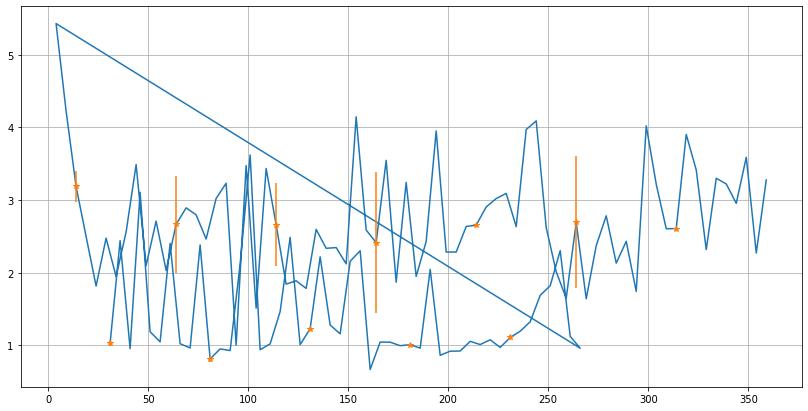

In [11]:
d = df.iloc[30:627:5]

plt.figure(figsize=(14,7))
plt.plot(d['rank'].values,
         d['avg_EventLatency'].values
)
plt.errorbar(d[::10]['rank'].values,
             d[::10]['avg_EventLatency'].values,
             d[::10]['var_EventLatency'].values, linestyle='None', marker='*')

plt.grid();

In [ ]:
d = df.iloc[30:627:10]

plt.figure(figsize=(7,7))
plt.errorbar(d['rank'].values,
             d['avg_EventLatency'].values,
             d['var_EventLatency'].values, linestyle='None', marker='*')

plt.grid();

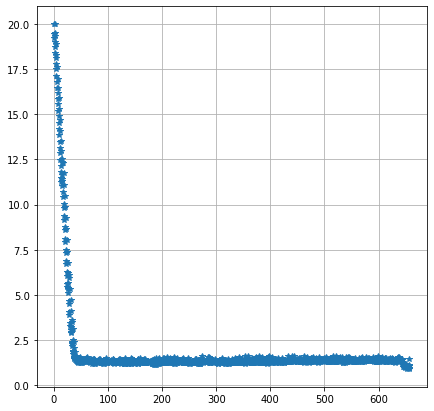

In [93]:
d = df[(df.TotalMessages == 5e6) & (df.kafka == 1) & (df.spark == 1)]

plt.figure(figsize=(7,7))
plt.errorbar(d['rank'].values,
             d['avg_EventLatency'].values,
             d['var_EventLatency'].values, linestyle='None', marker='*')

plt.grid();

In [101]:
df[(df.TotalMessages == 5e6) & (df.kafka == 1) & (df.spark == 1)].groupby('rank').mean()

,avg_EventLatency,avg_ProcessingLatency,var_EventLatency,var_ProcessingLatency,TotalMessages,iteration,kafka,spark
rank,,,,,,,,
1,19.576984,5.847279,0.004842,0.023804,5000000,1,1,1
2,19.471169,6.394298,0.016448,0.028223,5000000,1,1,1
3,18.899914,6.822512,0.035991,0.009968,5000000,1,1,1
4,18.278689,7.201422,0.027935,0.015291,5000000,1,1,1
5,17.650740,7.572597,0.038099,0.008857,5000000,1,1,1
...,...,...,...,...,...,...,...,...
653,0.990006,0.578390,0.038288,0.001083,5000000,1,1,1
654,0.964109,0.582758,0.029490,0.001777,5000000,1,1,1
655,0.955894,0.574623,0.045681,0.001204,5000000,1,1,1


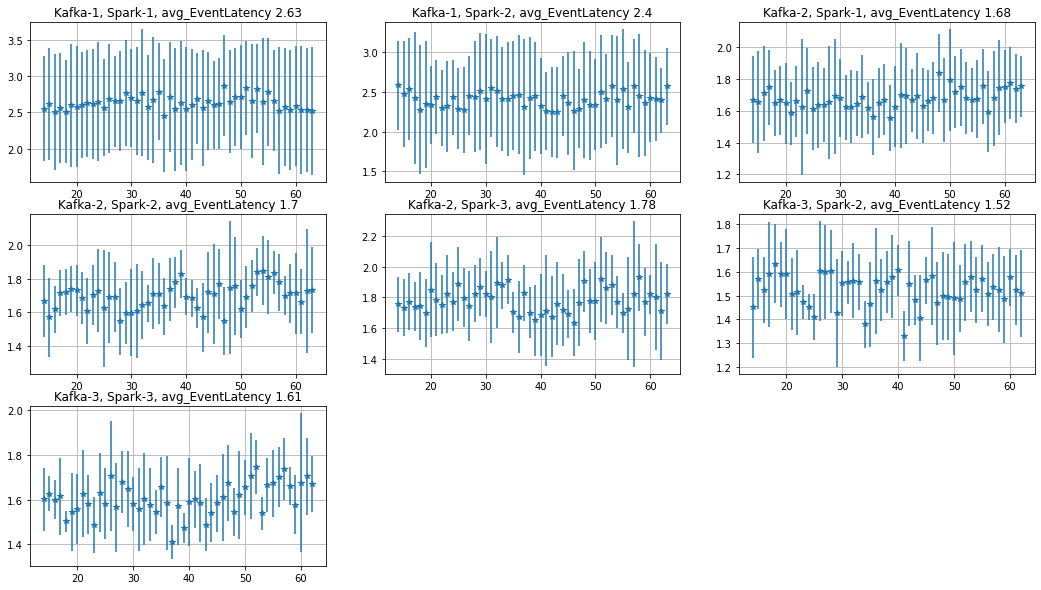

In [7]:
plt.figure(figsize=(18,10))
comb = [(1,1), (1,2), (2,1), (2,2), (2,3), (3,2), (3,3)]
events = []

for index,(k,s) in enumerate(comb):
    plt.subplot(3, 3,index+1)
    d = df[(df.TotalMessages == 1e7) & (df.kafka == k) & (df.spark == s)].groupby('rank').mean()
    d = d.loc[d.shape[0] * 0.2:d.shape[0] * 0.95]
    events.append(d["avg_EventLatency"].values.mean())
    plt.title(f'Kafka-{k}, Spark-{s}, avg_EventLatency {np.round(events[-1],2)}')

    plt.errorbar(d.index.values,
                 d['avg_EventLatency'].values,
                 d['var_EventLatency'].values, linestyle='None', marker='*')

    plt.grid();
    

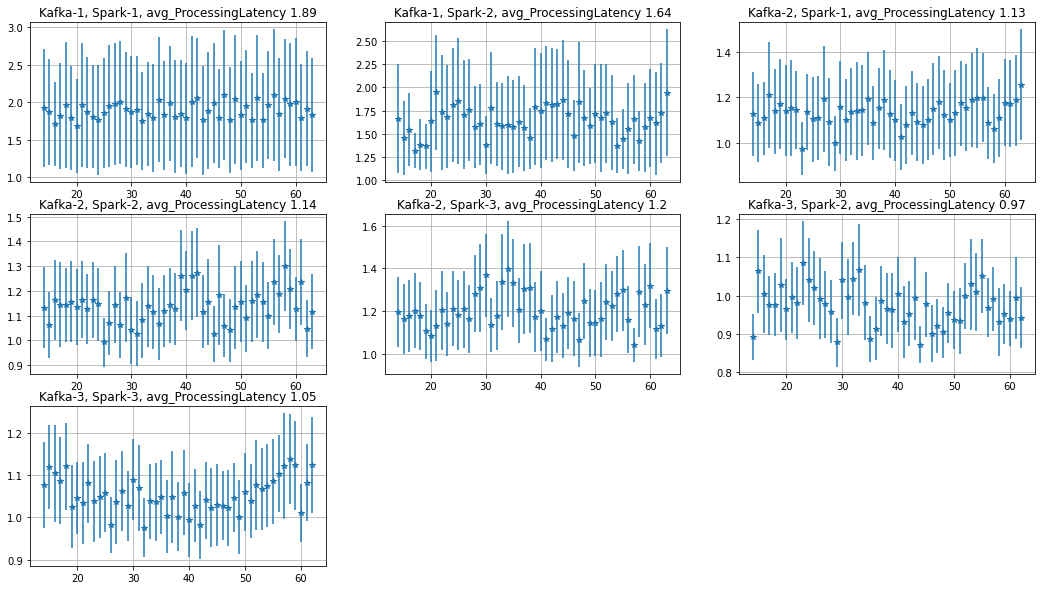

In [8]:
plt.figure(figsize=(18,10))
process = []

for index,(k,s) in enumerate(comb):
    plt.subplot(3, 3,index+1)
    d = df[(df.TotalMessages == 1e7) & (df.kafka == k) & (df.spark == s)].groupby('rank').mean()
    d = d.loc[d.shape[0] * 0.2:d.shape[0] * 0.95]
    process.append(d["avg_ProcessingLatency"].values.mean())
    plt.title(f'Kafka-{k}, Spark-{s}, avg_ProcessingLatency {np.round(process[-1],2)}')

    plt.errorbar(d.index.values,
                 d['avg_ProcessingLatency'].values,
                 d['var_ProcessingLatency'].values, linestyle='None', marker='*')

    plt.grid();

In [140]:
np.corrcoef(process, events)

array([[1.        , 0.99862023],
       [0.99862023, 1.        ]])

/tmp/ipykernel_13630/4260427904.py:8: RuntimeWarning: Mean of empty slice.
  events.append(d20["avg_EventLatency"].values.mean())
/var/scratch/ddps2107/Soft/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


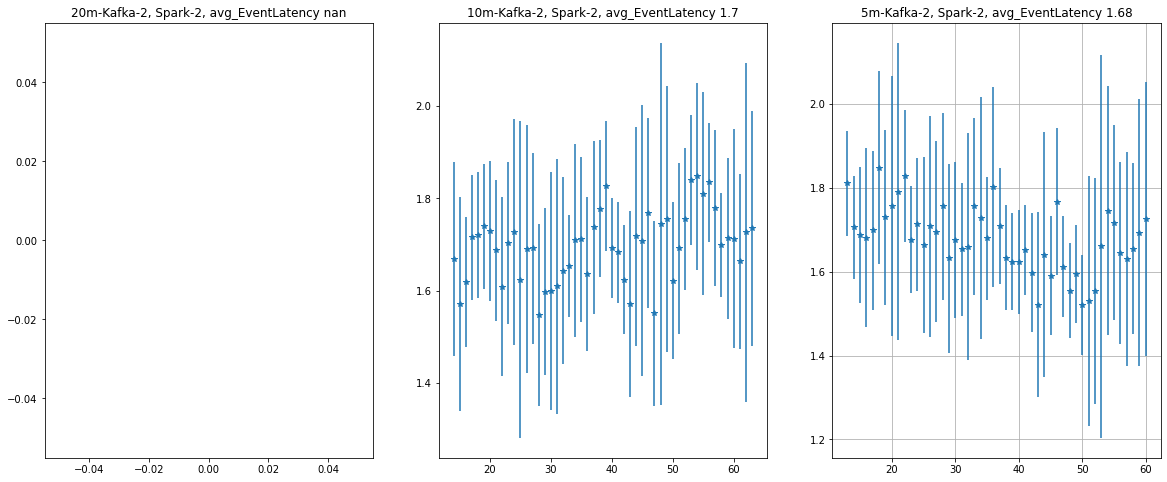

In [18]:
kafka = 2
spark = 2
comb = [(1,1), (1,2), (2,1), (2,2), (2,3), (3,2), (3,3)]

for

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
d20 = df[(df.TotalMessages == 2e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
d20 = d20.loc[d20.shape[0] * 0.2:d20.shape[0] * 0.95]
events.append(d20["avg_EventLatency"].values.mean())
plt.title(f'20m-Kafka-{kafka}, Spark-{spark}, avg_EventLatency {np.round(events[-1],2)}')
plt.errorbar(d20.index.values,
             d20['avg_EventLatency'].values,
             d20['var_EventLatency'].values, linestyle='None', marker='*')


plt.subplot(1,3,2)
d10 = df[(df.TotalMessages == 1e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
d10 = d10.loc[d10.shape[0] * 0.2:d10.shape[0] * 0.95]
events.append(d10["avg_EventLatency"].values.mean())
plt.title(f'10m-Kafka-{kafka}, Spark-{spark}, avg_EventLatency {np.round(events[-1],2)}')

plt.errorbar(d10.index.values,
             d10['avg_EventLatency'].values,
             d10['var_EventLatency'].values, linestyle='None', marker='*')



plt.subplot(1,3,3)
d5 = df[(df.TotalMessages == 5e6) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
d5 = d5.loc[d5.shape[0] * 0.2:d5.shape[0] * 0.95]
events.append(d5["avg_EventLatency"].values.mean())
plt.title(f'5m-Kafka-{kafka}, Spark-{spark}, avg_EventLatency {np.round(events[-1],2)}')

plt.errorbar(d5.index.values,
             d5['avg_EventLatency'].values,
             d5['var_EventLatency'].values, linestyle='None', marker='*')

plt.grid();

/tmp/ipykernel_13630/2377835444.py:10: RuntimeWarning: Mean of empty slice.
  events.append(d20["avg_EventLatency"].values.mean())
/var/scratch/ddps2107/Soft/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_13630/2377835444.py:10: RuntimeWarning: Mean of empty slice.
  events.append(d20["avg_EventLatency"].values.mean())
/var/scratch/ddps2107/Soft/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_13630/2377835444.py:10: RuntimeWarning: Mean of empty slice.
  events.append(d20["avg_EventLatency"].values.mean())
/var/scratch/ddps2107/Soft/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_13630/2377835444.py

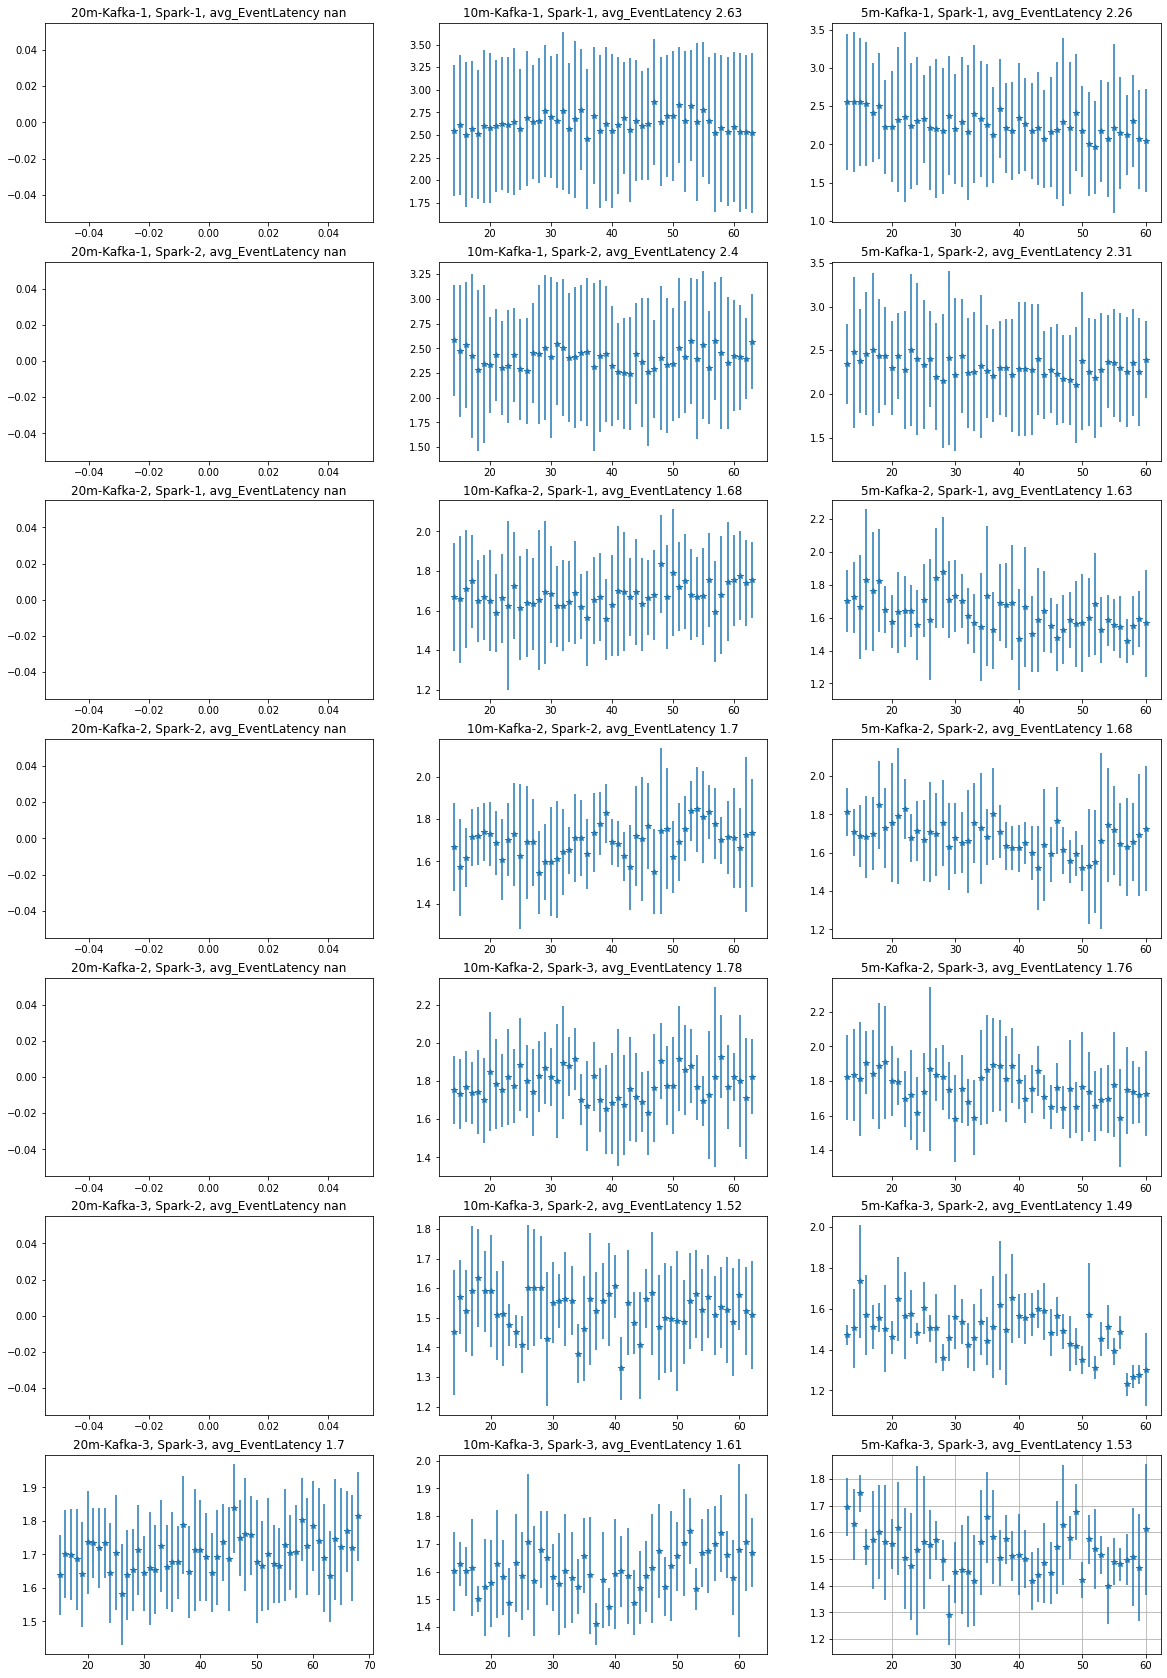

In [23]:
comb = [(1,1), (1,2), (2,1), (2,2), (2,3), (3,2), (3,3)]

plt.figure(figsize=(20,30))
plt_index = 1
for index,(kafka,spark) in enumerate(comb):
    plt.subplot(7, 3,plt_index)

    d20 = df[(df.TotalMessages == 2e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d20 = d20.loc[d20.shape[0] * 0.2:d20.shape[0] * 0.95]
    events.append(d20["avg_EventLatency"].values.mean())
    plt.title(f'20m-Kafka-{kafka}, Spark-{spark}, avg_EventLatency {np.round(events[-1],2)}')
    plt.errorbar(d20.index.values,
                 d20['avg_EventLatency'].values,
                 d20['var_EventLatency'].values, linestyle='None', marker='*')


    plt.subplot(7,3,plt_index+1)
    d10 = df[(df.TotalMessages == 1e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d10 = d10.loc[d10.shape[0] * 0.2:d10.shape[0] * 0.95]
    events.append(d10["avg_EventLatency"].values.mean())
    plt.title(f'10m-Kafka-{kafka}, Spark-{spark}, avg_EventLatency {np.round(events[-1],2)}')

    plt.errorbar(d10.index.values,
                 d10['avg_EventLatency'].values,
                 d10['var_EventLatency'].values, linestyle='None', marker='*')



    plt.subplot(7,3,plt_index+2)
    d5 = df[(df.TotalMessages == 5e6) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d5 = d5.loc[d5.shape[0] * 0.2:d5.shape[0] * 0.95]
    events.append(d5["avg_EventLatency"].values.mean())
    plt.title(f'5m-Kafka-{kafka}, Spark-{spark}, avg_EventLatency {np.round(events[-1],2)}')

    plt.errorbar(d5.index.values,
                 d5['avg_EventLatency'].values,
                 d5['var_EventLatency'].values, linestyle='None', marker='*')

    plt_index+=3
plt.grid();

/tmp/ipykernel_13630/879146219.py:11: RuntimeWarning: Mean of empty slice.
  events.append(d20[f'avg_{metric}'].values.mean())
/var/scratch/ddps2107/Soft/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_13630/879146219.py:11: RuntimeWarning: Mean of empty slice.
  events.append(d20[f'avg_{metric}'].values.mean())
/var/scratch/ddps2107/Soft/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_13630/879146219.py:11: RuntimeWarning: Mean of empty slice.
  events.append(d20[f'avg_{metric}'].values.mean())
/var/scratch/ddps2107/Soft/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_13630/879146219.py:11: RuntimeW

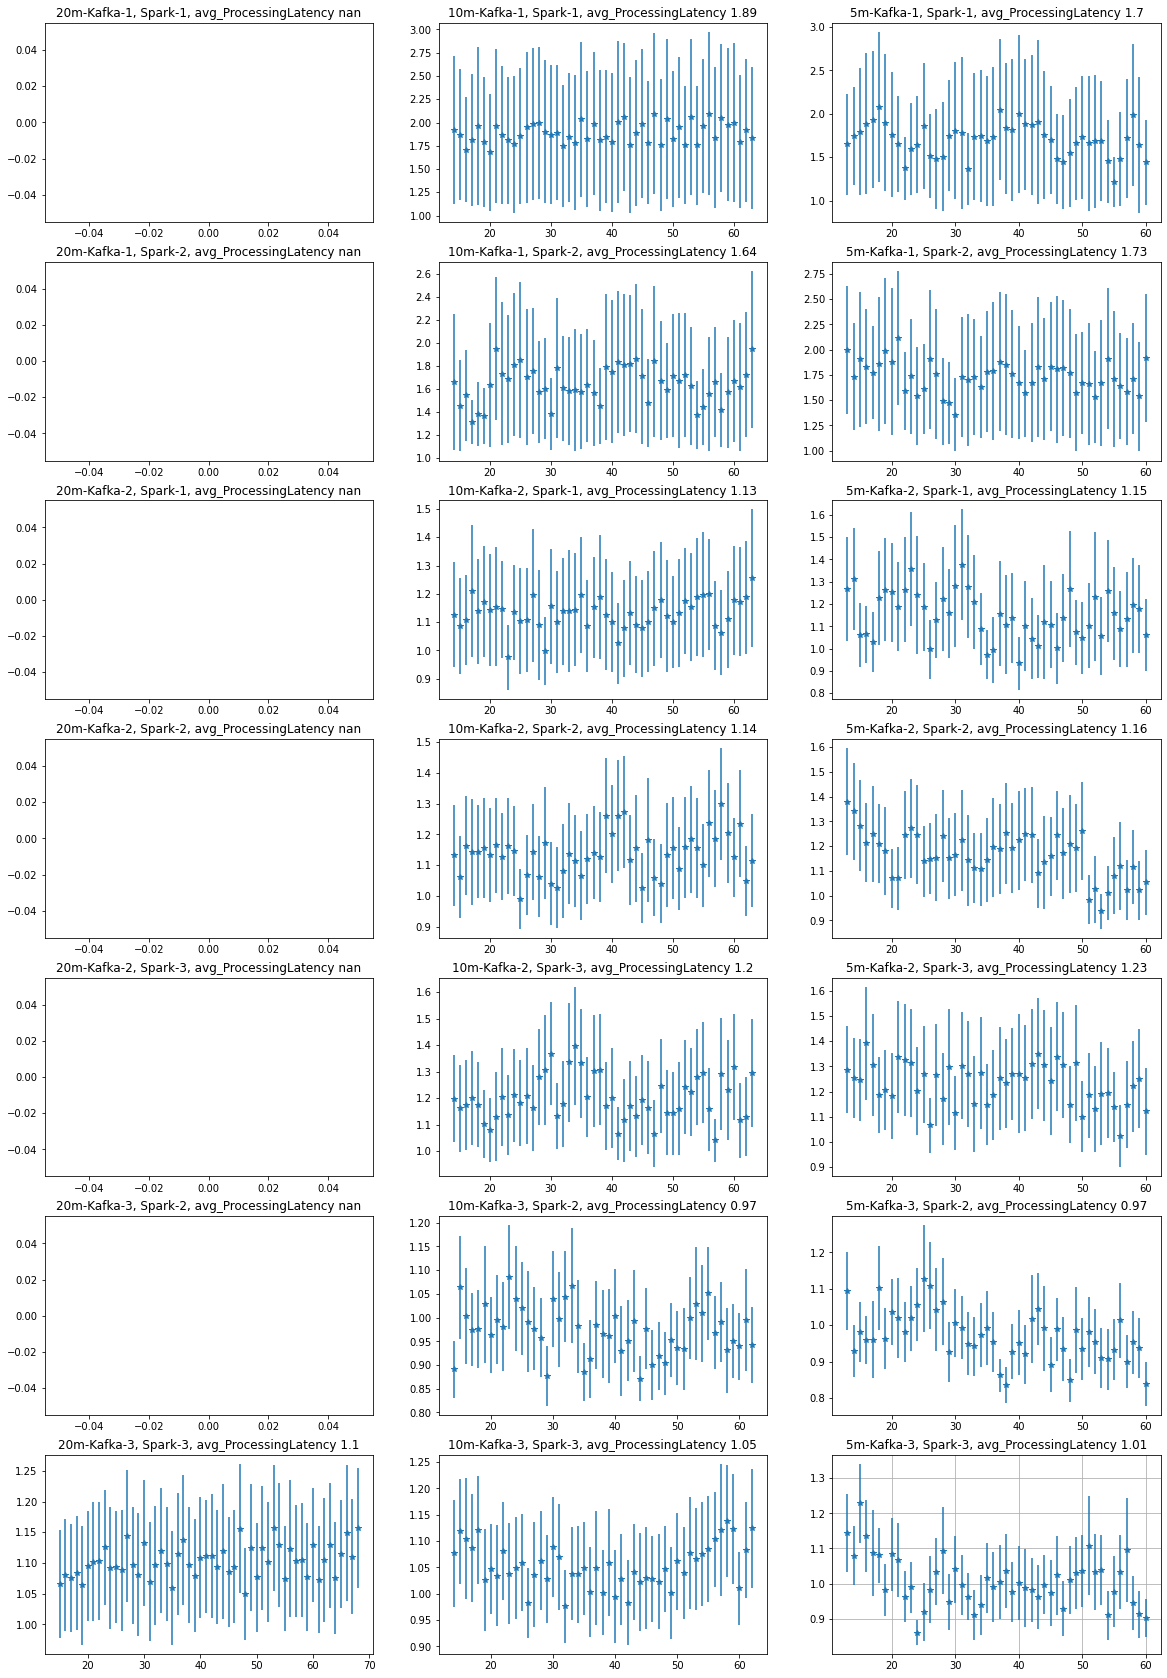

In [27]:
metric='ProcessingLatency'
comb = [(1,1), (1,2), (2,1), (2,2), (2,3), (3,2), (3,3)]

plt.figure(figsize=(20,30))
plt_index = 1
for index,(kafka,spark) in enumerate(comb):
    plt.subplot(7, 3,plt_index)

    d20 = df[(df.TotalMessages == 2e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d20 = d20.loc[d20.shape[0] * 0.2:d20.shape[0] * 0.95]
    events.append(d20[f'avg_{metric}'].values.mean())
    plt.title(f'20m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')
    plt.errorbar(d20.index.values,
                 d20[f'avg_{metric}'].values,
                 d20[f'var_{metric}'].values, linestyle='None', marker='*')


    plt.subplot(7,3,plt_index+1)
    d10 = df[(df.TotalMessages == 1e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d10 = d10.loc[d10.shape[0] * 0.2:d10.shape[0] * 0.95]
    events.append(d10[f"avg_{metric}"].values.mean())
    plt.title(f'10m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d10.index.values,
                 d10[f'avg_{metric}'].values,
                 d10[f'var_{metric}'].values, linestyle='None', marker='*')



    plt.subplot(7,3,plt_index+2)
    d5 = df[(df.TotalMessages == 5e6) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d5 = d5.loc[d5.shape[0] * 0.2:d5.shape[0] * 0.95]
    events.append(d5[f"avg_{metric}"].values.mean())
    plt.title(f'5m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d5.index.values,
                 d5[f'avg_{metric}'].values,
                 d5[f'var_{metric}'].values, linestyle='None', marker='*')

    plt_index+=3
plt.grid();

In [ ]:
plt.style.use('seaborn-whitegrid')

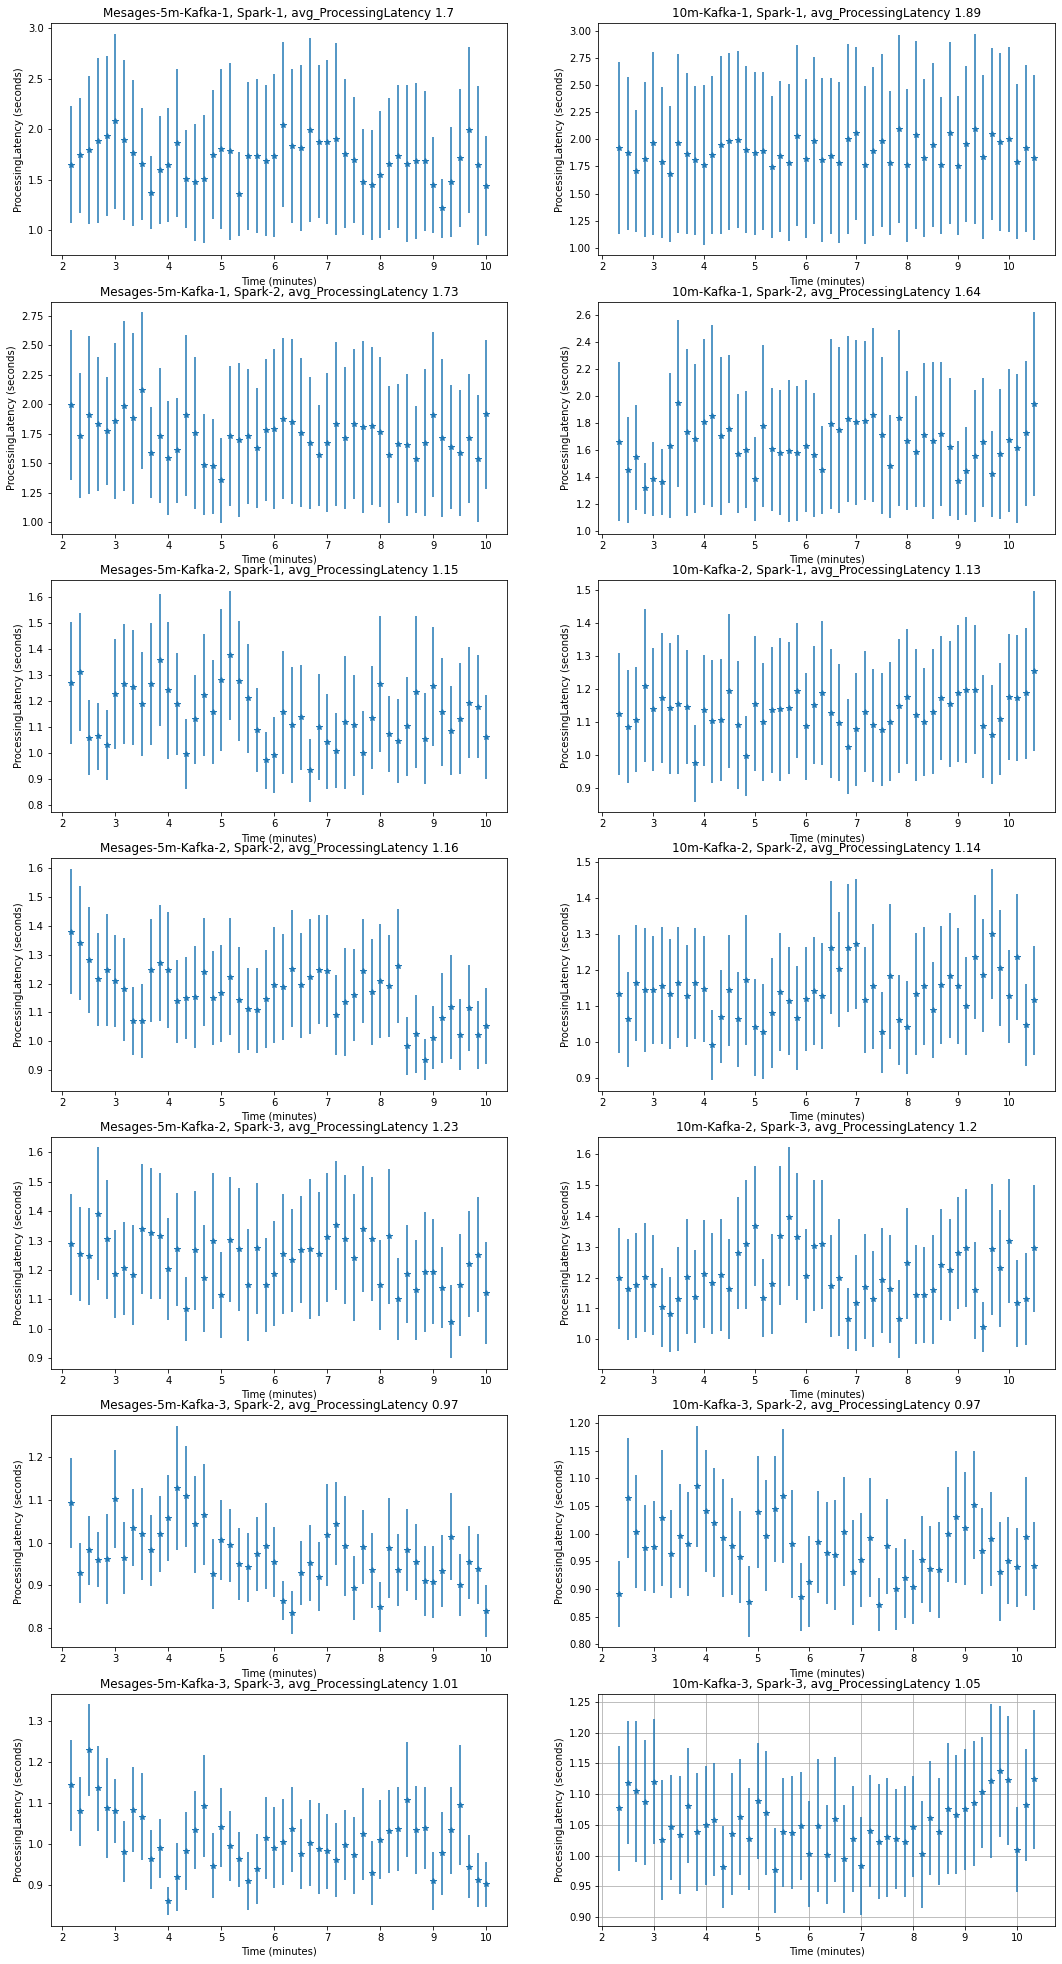

In [124]:
metric='ProcessingLatency'
comb = [(1,1), (1,2), (2,1), (2,2), (2,3), (3,2), (3,3)]

plt.figure(figsize=(18,35))
plt_index = 1
for index,(kafka,spark) in enumerate(comb):
    # plt.subplot(7, 2, plt_index)

    # d20 = df[(df.TotalMessages == 2e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    # d20 = d20.loc[d20.shape[0] * 0.2:d20.shape[0] * 0.95]
    # events.append(d20[f'avg_{metric}'].values.mean())
    # plt.title(f'20m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')
    # plt.errorbar(d20.index.values,
    #              d20[f'avg_{metric}'].values,
    #              d20[f'var_{metric}'].values, linestyle='None', marker='*')
    plt.subplot(7,2,plt_index)
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')
    d5 = df[(df.TotalMessages == 5e6) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d5 = d5.loc[d5.shape[0] * 0.2:d5.shape[0] * 0.95]
    events.append(d5[f"avg_{metric}"].values.mean())
    plt.title(f'Mesages-5m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d5.index.values / 6,
                 d5[f'avg_{metric}'].values,
                 d5[f'var_{metric}'].values, linestyle='None', marker='*')

    plt.subplot(7,2,plt_index+1)
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')
    d10 = df[(df.TotalMessages == 1e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d10 = d10.loc[d10.shape[0] * 0.2:d10.shape[0] * 0.95]
    events.append(d10[f"avg_{metric}"].values.mean())
    plt.title(f'10m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d10.index.values / 6,
                 d10[f'avg_{metric}'].values,
                 d10[f'var_{metric}'].values, linestyle='None', marker='*')


    plt_index+=2
plt.grid()
plt.savefig('plots/mks-comparison-processing.png');

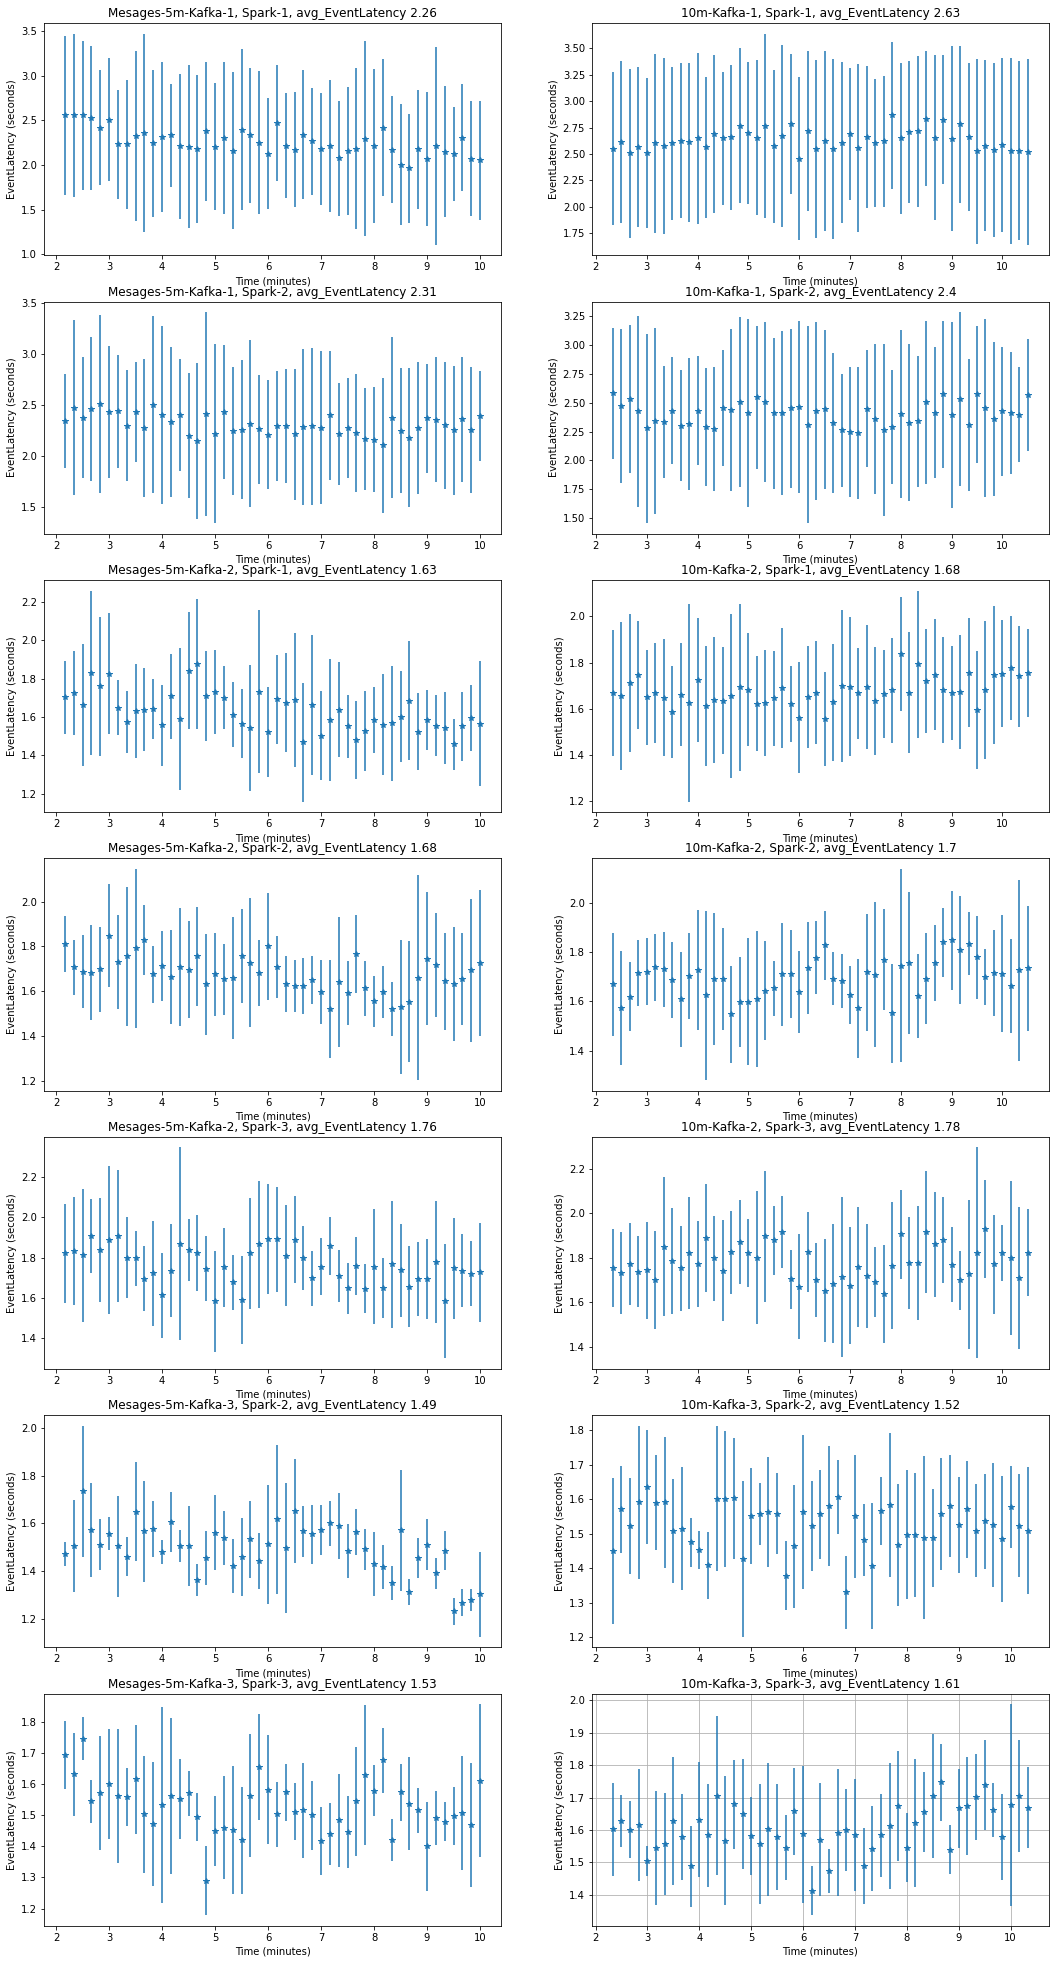

In [128]:
metric='EventLatency'
comb = [(1,1), (1,2), (2,1), (2,2), (2,3), (3,2), (3,3)]
events = []

plt.figure(figsize=(18,35))
plt_index = 1
for index,(kafka,spark) in enumerate(comb):
    # plt.subplot(7, 2, plt_index)

    # d20 = df[(df.TotalMessages == 2e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    # d20 = d20.loc[d20.shape[0] * 0.2:d20.shape[0] * 0.95]
    # events.append(d20[f'avg_{metric}'].values.mean())
    # plt.title(f'20m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')
    # plt.errorbar(d20.index.values,
    #              d20[f'avg_{metric}'].values,
    #              d20[f'var_{metric}'].values, linestyle='None', marker='*')
    plt.subplot(7,2,plt_index)
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')
    d5 = df[(df.TotalMessages == 5e6) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d5 = d5.loc[d5.shape[0] * 0.2:d5.shape[0] * 0.95]
    events.append(d5[f"avg_{metric}"].values.mean())
    plt.title(f'Mesages-5m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d5.index.values / 6,
                 d5[f'avg_{metric}'].values,
                 d5[f'var_{metric}'].values, linestyle='None', marker='*')

    plt.subplot(7,2,plt_index+1)
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')
    d10 = df[(df.TotalMessages == 1e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d10 = d10.loc[d10.shape[0] * 0.2:d10.shape[0] * 0.95]
    events.append(d10[f"avg_{metric}"].values.mean())
    plt.title(f'10m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d10.index.values / 6,
                 d10[f'avg_{metric}'].values,
                 d10[f'var_{metric}'].values, linestyle='None', marker='*')


    plt_index+=2
plt.grid()
plt.savefig('plots/mks-comparison-event.png');

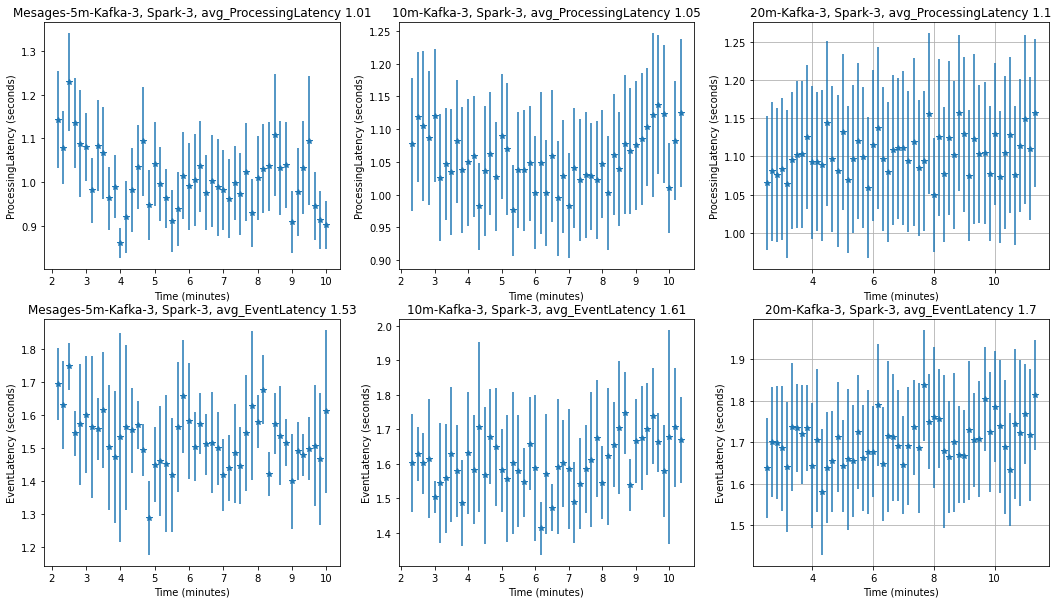

In [133]:
metric='ProcessingLatency'
comb = [(3,3)]

plt.figure(figsize=(18,10))
plt_index = 1
for index,(kafka,spark) in enumerate(comb):
    plt.subplot(2,3,plt_index)
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')
    d5 = df[(df.TotalMessages == 5e6) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d5 = d5.loc[d5.shape[0] * 0.2:d5.shape[0] * 0.95]
    events.append(d5[f"avg_{metric}"].values.mean())
    plt.title(f'Mesages-5m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d5.index.values / 6,
                 d5[f'avg_{metric}'].values,
                 d5[f'var_{metric}'].values, linestyle='None', marker='*')

    plt.subplot(2,3,plt_index+1)
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')
    d10 = df[(df.TotalMessages == 1e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d10 = d10.loc[d10.shape[0] * 0.2:d10.shape[0] * 0.95]
    events.append(d10[f"avg_{metric}"].values.mean())
    plt.title(f'10m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d10.index.values / 6,
                 d10[f'avg_{metric}'].values,
                 d10[f'var_{metric}'].values, marker='*',linestyle='None')
    
    plt.subplot(2, 3, plt_index+2)

    d20 = df[(df.TotalMessages == 2e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d20 = d20.loc[d20.shape[0] * 0.2:d20.shape[0] * 0.95]
    events.append(d20[f'avg_{metric}'].values.mean())
    plt.title(f'20m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')
    plt.errorbar(d20.index.values / 6,
                 d20[f'avg_{metric}'].values,
                 d20[f'var_{metric}'].values, linestyle='None', marker='*')
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')


    plt_index+=2
plt.grid()

metric='EventLatency'
comb = [(3,3)]
for index,(kafka,spark) in enumerate(comb):
    plt.subplot(2,3,4)
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')
    d5 = df[(df.TotalMessages == 5e6) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d5 = d5.loc[d5.shape[0] * 0.2:d5.shape[0] * 0.95]
    events.append(d5[f"avg_{metric}"].values.mean())
    plt.title(f'Mesages-5m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d5.index.values / 6,
                 d5[f'avg_{metric}'].values,
                 d5[f'var_{metric}'].values, linestyle='None', marker='*')

    plt.subplot(2,3,5)
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')
    d10 = df[(df.TotalMessages == 1e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d10 = d10.loc[d10.shape[0] * 0.2:d10.shape[0] * 0.95]
    events.append(d10[f"avg_{metric}"].values.mean())
    plt.title(f'10m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d10.index.values / 6,
                 d10[f'avg_{metric}'].values,
                 d10[f'var_{metric}'].values, marker='*',linestyle='None')
    
    plt.subplot(2, 3, 6)

    d20 = df[(df.TotalMessages == 2e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d20 = d20.loc[d20.shape[0] * 0.2:d20.shape[0] * 0.95]
    events.append(d20[f'avg_{metric}'].values.mean())
    plt.title(f'20m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')
    plt.errorbar(d20.index.values / 6,
                 d20[f'avg_{metric}'].values,
                 d20[f'var_{metric}'].values, linestyle='None', marker='*')
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')


    plt_index+=2
plt.grid()
plt.savefig('plots/k3s3m(5,10,20)-comparison.png');

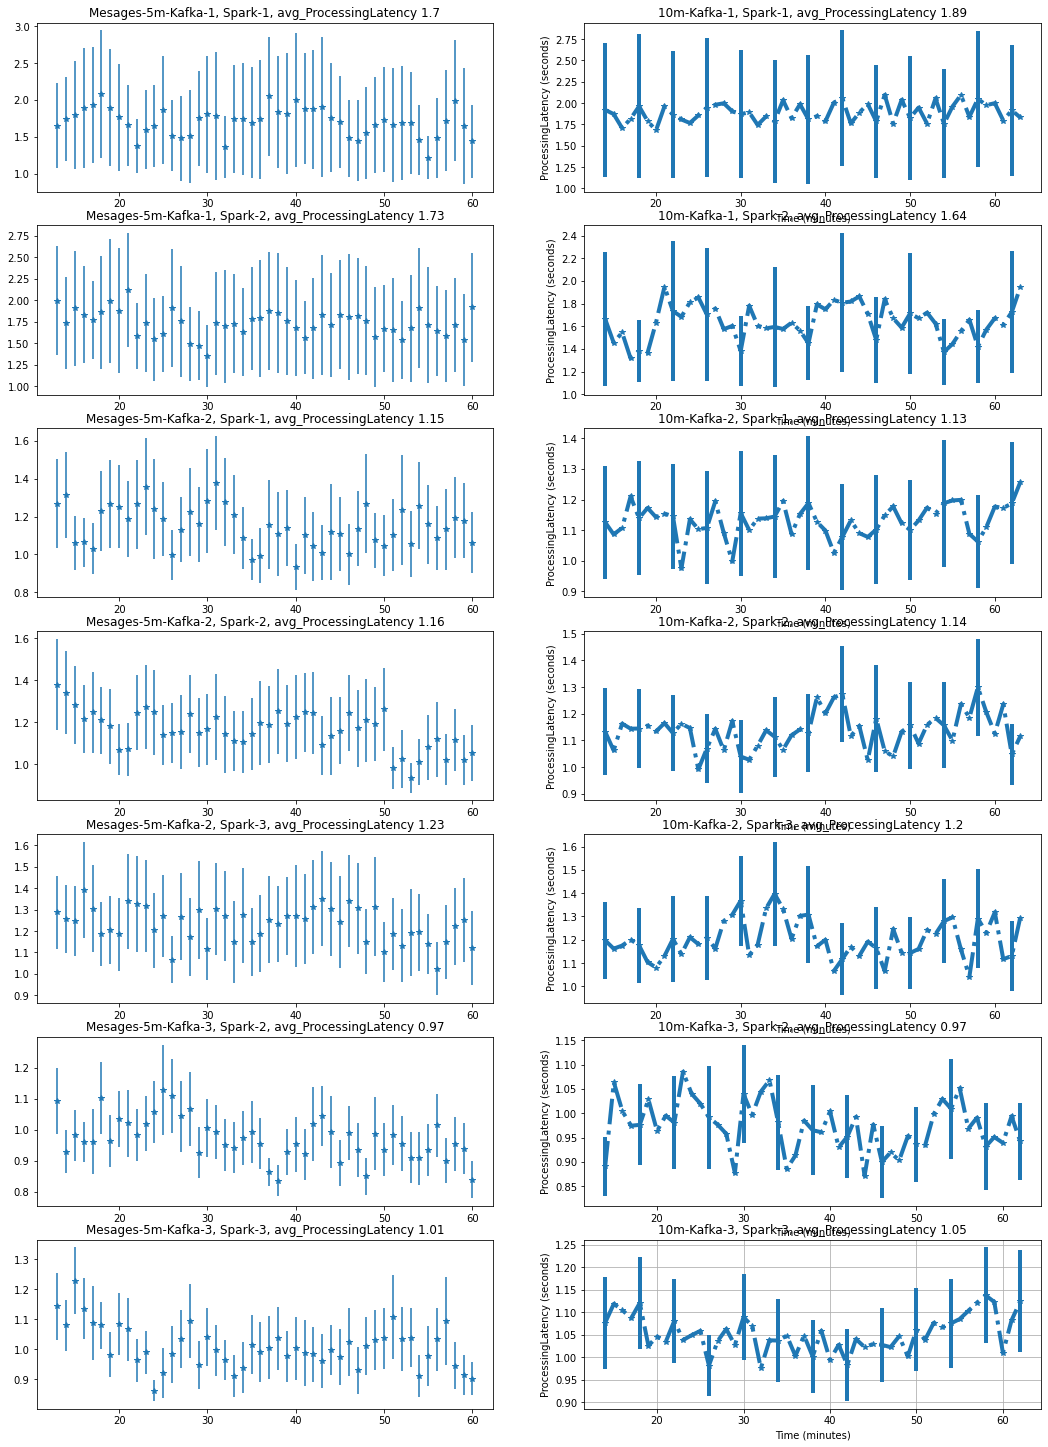

In [85]:
metric='ProcessingLatency'
comb = [(1,1), (1,2), (2,1), (2,2), (2,3), (3,2), (3,3)]

plt.figure(figsize=(18,25.5))
plt_index = 1
for index,(kafka,spark) in enumerate(comb):
    # plt.subplot(7, 2, plt_index)

    # d20 = df[(df.TotalMessages == 2e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    # d20 = d20.loc[d20.shape[0] * 0.2:d20.shape[0] * 0.95]
    # events.append(d20[f'avg_{metric}'].values.mean())
    # plt.title(f'20m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')
    # plt.errorbar(d20.index.values,
    #              d20[f'avg_{metric}'].values,
    #              d20[f'var_{metric}'].values, linestyle='None', marker='*')
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')
    plt.subplot(7,2,plt_index)
    d5 = df[(df.TotalMessages == 5e6) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d5 = d5.loc[d5.shape[0] * 0.2:d5.shape[0] * 0.95]
    events.append(d5[f"avg_{metric}"].values.mean())
    plt.title(f'Mesages-5m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d5.index.values,
                 d5[f'avg_{metric}'].values,
                 d5[f'var_{metric}'].values, linestyle='None', marker='*')

    plt.subplot(7,2,plt_index+1)
    plt.ylabel(f'{metric} (seconds)')
    plt.xlabel(f'Time (minutes)')
    d10 = df[(df.TotalMessages == 1e7) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d10 = d10.loc[d10.shape[0] * 0.2:d10.shape[0] * 0.95]
    events.append(d10[f"avg_{metric}"].values.mean())
    plt.title(f'10m-Kafka-{kafka}, Spark-{spark}, avg_{metric} {np.round(events[-1],2)}')

    plt.errorbar(d10.index.values,
                 d10[f'avg_{metric}'].values,
                 d10[f'var_{metric}'].values, marker='*',
                 errorevery=4,  ls='-.')


    plt_index+=2
plt.grid()
plt.savefig('plots/mks-comparison-processing.png');

In [141]:
(np.array(events) - np.array(process))

array([1.10836395, 1.30648984, 1.14745739, 1.16536613, 0.97732426,
       1.22130069, 1.18418227])

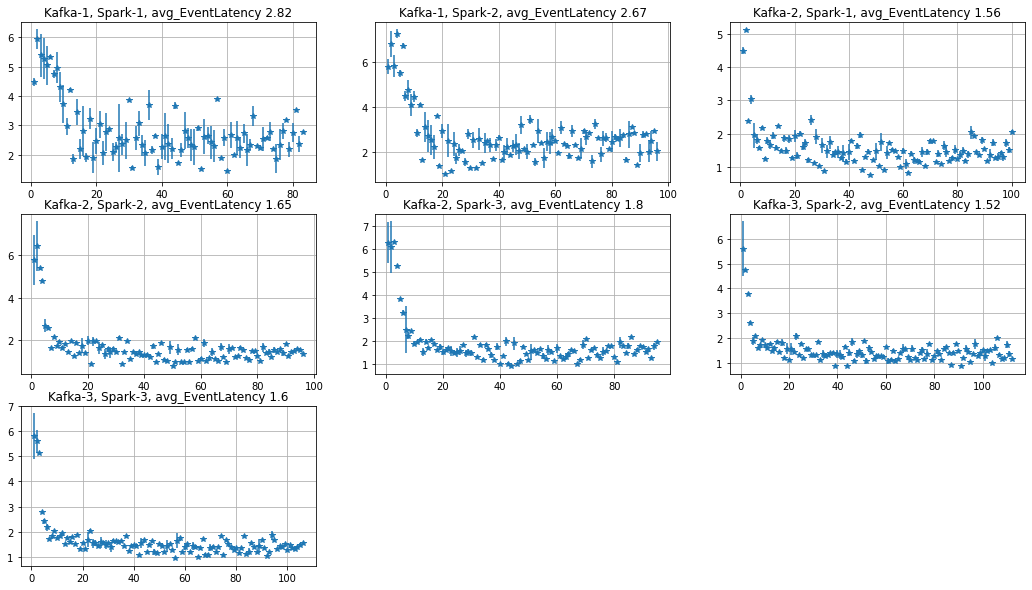

In [16]:
plt.figure(figsize=(18,10))
comb = [(1,1), (1,2), (2,1), (2,2), (2,3), (3,2), (3,3)]
events = []

for index,(k,s) in enumerate(comb):
    plt.subplot(3, 3,index+1)
    d = df[(df.TotalMessages == 1e7) & (df.kafka == k) & (df.spark == s)].groupby('rank').mean()
    d = d.loc[:d.shape[0] * 0.2]
    events.append(d["avg_EventLatency"].values.mean())
    plt.title(f'Kafka-{k}, Spark-{s}, avg_EventLatency {np.round(events[-1],2)}')

    plt.errorbar(d.index.values,
                 d['avg_EventLatency'].values,
                 d['var_EventLatency'].values, linestyle='None', marker='*')

    plt.grid();

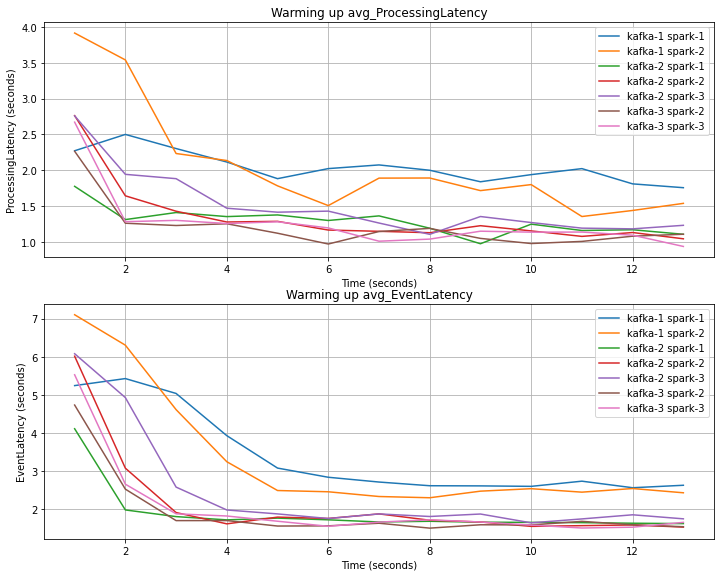

In [70]:
plt.figure(figsize=(12,9.5))
process = []

plt.subplot(2,1,1)
plt.title('Warming up avg_ProcessingLatency')
plt.ylabel(f'ProcessingLatency (seconds)')
plt.xlabel(f'Time (seconds)')
for index,(k,s) in enumerate(comb):
    # plt.subplot(3, 3,index+1)
    d = df[(df.TotalMessages == 1e7) & (df.kafka == k) & (df.spark == s)].groupby('rank').mean()
    d = d.loc[:d.shape[0] * 0.2]
    process.append(d["avg_ProcessingLatency"].values.mean())
    # plt.title(f'Kafka-{k}, Spark-{s}, avg_ProcessingLatency {np.round(process[-1],2)}')

    plt.plot(d.index.values, d['avg_ProcessingLatency'].values, label=f'kafka-{k} spark-{s}')
    # plt.errorbar(d.index.values,
    #              d['avg_ProcessingLatency'].values,
    #              d['var_ProcessingLatency'].values, linestyle='None', marker='*')

plt.legend()
plt.grid();

plt.subplot(2,1,2)
plt.title('Warming up avg_EventLatency')
plt.ylabel(f'EventLatency (seconds)')
plt.xlabel(f'Time (seconds)')
for index,(k,s) in enumerate(comb):
    # plt.subplot(3, 3,index+1)
    d = df[(df.TotalMessages == 1e7) & (df.kafka == k) & (df.spark == s)].groupby('rank').mean()
    d = d.loc[:d.shape[0] * 0.2]
    process.append(d["avg_EventLatency"].values.mean())
    # plt.title(f'Kafka-{k}, Spark-{s}, avg_ProcessingLatency {np.round(process[-1],2)}')

    plt.plot(d.index.values, d['avg_EventLatency'].values, label=f'kafka-{k} spark-{s}')
    # plt.errorbar(d.index.values,
    #              d['avg_ProcessingLatency'].values,
    #              d['var_ProcessingLatency'].values, linestyle='None', marker='*')

plt.legend()
plt.grid()
plt.savefig('plots/ks-comparioson-warming-up.png');

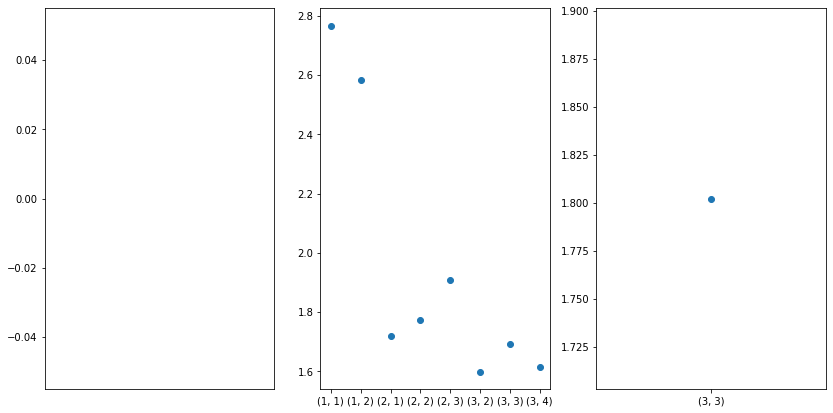

In [42]:
plt.figure(figsize=(14,7))

groups = df[(df['TotalMessages'] == 5e6) & (df['rank'] > 180)].groupby(['kafka', 'spark']).groups.keys()
vals = df[(df['TotalMessages'] == 5e6) & (df['rank'] > 180)].groupby(['kafka', 'spark']).mean()['avg_EventLatency'].values

plt.subplot(1,3,1)
plt.scatter(
    list(range(len(vals))),
    vals
)
plt.xticks(list(range(len(vals))),labels=groups);

plt.subplot(1,3,2)
groups = df[df['TotalMessages'] == 1e7].groupby(['kafka', 'spark']).groups.keys()
vals = df[df['TotalMessages'] == 1e7].groupby(['kafka', 'spark']).mean()['avg_EventLatency'].values

# for g,v in zip(groups, vals):
plt.scatter(
    list(range(len(vals))),
    vals
)
plt.xticks(list(range(len(vals))),labels=groups);

plt.subplot(1,3,3)
groups = df[df['TotalMessages'] > 1e7].groupby(['kafka', 'spark']).groups.keys()
vals = df[df['TotalMessages'] > 1e7].groupby(['kafka', 'spark']).mean()['avg_EventLatency'].values

# for g,v in zip(groups, vals):
plt.scatter(
    list(range(len(vals))),
    vals
)
plt.xticks(list(range(len(vals))),labels=groups);

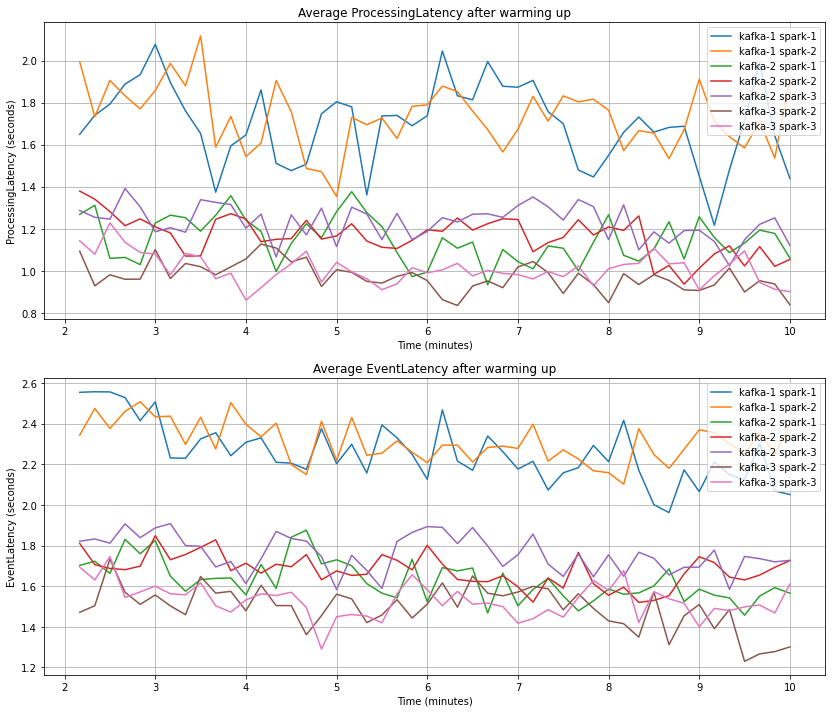

In [132]:
metric='ProcessingLatency'
comb = [(1,1), (1,2), (2,1), (2,2), (2,3), (3,2), (3,3)]

plt.figure(figsize=(14,12))

plt.subplot(2,1,1)
plt_index = 1
plt.title(f'Average {metric} after warming up')
plt.ylabel(f'{metric} (seconds)')
plt.xlabel(f'Time (minutes)')
for index,(kafka,spark) in enumerate(comb):
    d5 = df[(df.TotalMessages == 5e6) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d5 = d5.loc[d5.shape[0] * 0.2:d5.shape[0] * 0.95]
    events.append(d5[f"avg_{metric}"].values.mean())

    plt.plot(d5.index.values  / 6,
                 d5[f'avg_{metric}'].values,
                 # d5[f'var_{metric}'].values, linestyle='None', marker='*',
                 label=f'kafka-{kafka} spark-{spark}')

plt.legend(loc='upper right')
plt.grid();

metric='EventLatency'
comb = [(1,1), (1,2), (2,1), (2,2), (2,3), (3,2), (3,3)]

plt.subplot(2,1,2)
plt.title(f'Average {metric} after warming up')
plt.ylabel(f'{metric} (seconds)')
plt.xlabel(f'Time (minutes)')
plt_index = 1
for index,(kafka,spark) in enumerate(comb):
    d5 = df[(df.TotalMessages == 5e6) & (df.kafka == kafka) & (df.spark == spark)].groupby('rank').mean()
    d5 = d5.loc[d5.shape[0] * 0.2:d5.shape[0] * 0.95]
    events.append(d5[f"avg_{metric}"].values.mean())

    plt.plot(d5.index.values  / 6,
                 d5[f'avg_{metric}'].values,
                 # d5[f'var_{metric}'].values, linestyle='None', marker='*',
                 label=f'kafka-{kafka} spark-{spark}')

plt.legend(loc='upper right')
plt.grid()
plt.savefig('plots/ks-comparioson-metrics.png');